In [2]:
# Importing the pandas library and aliases it as pd. pandas is a powerful data analysis and manipulation library for Python, widely used for data processing tasks.
import pandas as pd

#  Assigns the path to the dataset file to the variable file_path. This path points to the location of our CSV file on our local system.
file_path = 'downloads/GRE_Reg_Data.csv'
#Uses pandas' read_csv function to read the CSV file located at file_path into a DataFrame named data. 
data = pd.read_csv(file_path)

# data.head(): Returns the first 5 rows of the DataFrame. This function is useful for quickly inspecting the contents of the dataset, including the column names, some of the data, and the data types.
# data.info(): Provides a concise summary of the DataFrame. It includes the following information:

#The number of non-null entries in each column.
#The data type of each column.
#The memory usage of the DataFrame.
data.head(), data.info()

# This output helps us understand the structure of our dataset and any potential issues, such as missing values, which we might need to address before performing further analysis.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247988 entries, 0 to 247987
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   REGISTRATION_NO   247988 non-null  int64 
 1   Date Registered   247988 non-null  object
 2   DATE OF EXAM OCC  247988 non-null  object
 3   TIME OCC          247988 non-null  int64 
 4   Age               247988 non-null  int64 
 5   Sex               215740 non-null  object
dtypes: int64(3), object(3)
memory usage: 11.4+ MB


(   REGISTRATION_NO Date Registered DATE OF EXAM OCC  TIME OCC  Age  Sex
 0        221412410       6/15/2022       11/12/2020      1700    0  NaN
 1        220314085       7/22/2022        5/12/2020      1110   27    F
 2        222013040        8/6/2022         6/4/2020      1620   60    M
 3        220614831       8/18/2022        8/17/2020      1200   28    M
 4        231207725       2/27/2023        1/27/2020       635   37    M,
 None)

In [3]:
# Convert date columns to datetime
# Objective: Convert columns containing date information from string format to datetime format for easier manipulation and analysis.

# data['Date Registered']: Accesses the 'Date Registered' column of the DataFrame data.

# pd.to_datetime(data['Date Registered'], format='%m/%d/%Y'):

# pd.to_datetime: Converts a string or an array-like object to datetime.
# data['Date Registered']: The data from the 'Date Registered' column.
# format='%m/%d/%Y': Specifies the format of the date strings in the column (%m = month, %d = day, %Y = 4-digit year). This format string is used to interpret the dates correctly.
# The resulting datetime objects replace the original string values in the 'Date Registered' column.
data['Date Registered'] = pd.to_datetime(data['Date Registered'], format='%m/%d/%Y')
# Converts the 'DATE OF EXAM OCC' column to datetime format using the same date format.

# Example Before and After Conversion
# Before: Date columns contain string values like "01/15/2023".
# After: Date columns contain datetime objects representing "2023-01-15". These can be easily used for date-related operations like filtering, comparison, and extracting parts of the date.
data['DATE OF EXAM OCC'] = pd.to_datetime(data['DATE OF EXAM OCC'], format='%m/%d/%Y')

# Extract hour from TIME OCC
# Objective: Extract the hour part from the TIME OCC column, which presumably contains time in military (24-hour) format without a colon.

# data['TIME OCC']: Accesses the 'TIME OCC' column, which contains time as an integer (e.g., 1530 for 3:30 PM).

# // 100: Integer division by 100. This operation removes the minutes part and keeps only the hour part.

#For example:
# 1530 // 100 results in 15 (representing 3 PM).
# 0900 // 100 results in 9 (representing 9 AM).
# The extracted hour value is stored in a new column named 'Hour'.

# Example of Extracted Hour
# Before: TIME OCC column contains 1530 for 3:30 PM.
# After: Hour column contains 15 for 3 PM

data['Hour'] = data['TIME OCC'] // 100

# Checking the result
# Display the first few rows of the DataFrame to verify the changes.
data.head()


,REGISTRATION_NO,Date Registered,DATE OF EXAM OCC,TIME OCC,Age,Sex,Hour
0,221412410,2022-06-15,2020-11-12,1700,0,NaN,17
1,220314085,2022-07-22,2020-05-12,1110,27,F,11
2,222013040,2022-08-06,2020-06-04,1620,60,M,16
3,220614831,2022-08-18,2020-08-17,1200,28,M,12
4,231207725,2023-02-27,2020-01-27,635,37,M,6


In [5]:
# Objective
# Convert columns containing date information from string format to datetime format for easier manipulation and analysis.
# Handle any errors that might occur during the conversion by setting invalid parsing to NaT (Not a Time).
# Function: pd.to_datetime
# pd.to_datetime: A function in pandas that converts an argument to datetime. It can parse date strings or arrays and convert them into datetime objects.
# Parameters
# data['Date Registered']:

# Accesses the 'Date Registered' column of the DataFrame data.
# This column presumably contains date values in string format, e.g., "01/15/2023".
# format='%m/%d/%Y':

# Specifies the format of the date strings.
# %m = 2-digit month (01 for January)
# %d = 2-digit day (15 for the 15th)
# %Y = 4-digit year (2023)
# The format string tells pd.to_datetime how to interpret the date values in the column.
# errors='coerce':

# Specifies the error-handling strategy.
# errors='coerce' tells pd.to_datetime to replace any values that cannot be parsed into valid dates with NaT (Not a Time).
# This is useful for dealing with invalid date formats or missing values, as it prevents the function from throwing an error and allows for further processing.


# The resulting datetime objects replace the original string values in the 'Date Registered' column.
# This ensures that the column contains valid datetime values where possible, and NaT for any unparseable or invalid entries.

data['Date Registered'] = pd.to_datetime(data['Date Registered'], format='%m/%d/%Y', errors='coerce')
# Converts the 'DATE OF EXAM OCC' column to datetime format using the same date format.
# Handles invalid dates by setting them to NaT.
data['DATE OF EXAM OCC'] = pd.to_datetime(data['DATE OF EXAM OCC'], format='%m/%d/%Y', errors='coerce')
# Example Before and After Conversion
# Before:
# data['Date Registered']: Contains strings like "01/15/2023".
# data['DATE OF EXAM OCC']: Contains strings like "02/10/2023".
# Possible invalid entries like "99/99/9999" or non-date values.
# After:
# data['Date Registered']: Contains datetime objects representing dates (e.g., 2023-01-15).
# data['DATE OF EXAM OCC']: Contains datetime objects representing dates (e.g., 2023-02-10).
# Invalid entries are converted to NaT.
# Handling NaT
# NaT (Not a Time): Represents missing or invalid datetime values.
# Post-Processing: We can later handle NaT values by filling them, removing rows, or otherwise handling missing data depending on our analysis needs.
# Usage of errors='coerce'
# Why Use errors='coerce'?
# Robustness: Ensures that the datetime conversion process doesn't fail due to invalid formats.
# Data Cleaning: Automatically deals with any bad data, making subsequent data processing more reliable.
# Flexibility: Allows us to handle invalid data points later, according to our analysis requirements, rather than causing the entire conversion to fail.
# Summary
# Convert Date Columns: Transforms the 'Date Registered' and 'DATE OF EXAM OCC' columns from string format to datetime format, facilitating date-based operations.
# Error Handling: Uses errors='coerce' to handle invalid dates gracefully by converting them to NaT.
# Ensures Valid Data: Makes sure the resulting DataFrame can handle date manipulations and calculations effectively, while managing any bad data points encountered during conversion.

In [6]:
# Objective
# Extract the hour portion from a time value stored in the TIME OCC column and create a new column, Hour, to store these extracted hour values.
# Detailed Explanation
# 1. Access Column:
# data['TIME OCC']:
# This accesses the TIME OCC column in the DataFrame data.
# The column likely contains time information as integers in 24-hour format (military time) without a colon, e.g., 1530 for 3:30 PM, 0930 for 9:30 AM.
# 2. Integer Division:
# // 100:
# This performs integer division by 100.
# Integer division truncates the decimal part, effectively isolating the hour part from the time value.
# For example:
# 1530 // 100 results in 15 (since 1530 divided by 100 is 15.3, and integer division truncates to 15).
# 0930 // 100 results in 9 (since 0930 divided by 100 is 9.3, and integer division truncates to 9).
# 0800 // 100 results in 8.
# 2400 // 100 results in 24.
# 3. Create New Column:

# The result of the integer division is assigned to a new column, Hour, in the DataFrame data.
# Each value in the new Hour column represents the hour extracted from the corresponding TIME OCC value.

data['Hour'] = data['TIME OCC'] // 100

# Example Before and After Extraction
# Before:
# TIME OCC: Contains values like 1530, 0930, 0800.
# After:
# Hour: Contains values like 15, 9, 8.



# Summary
# Extracts Hour: The code extracts the hour component from a 4-digit integer time format (HHMM) by performing integer division by 100.
# Creates New Column: Stores the extracted hour in a new column named Hour in the DataFrame.
# Enables Analysis: Makes it easier to analyze the data based on the time of day, as the hour component is now directly accessible.


In [7]:
# Objective
# Handle missing values in the 'Sex' column by replacing them with a placeholder value 'Unknown'.
# Detailed Explanation
# 1. Access Column:
# data['Sex']:
# This accesses the 'Sex' column in the DataFrame data.
# The column contains values representing the gender of candidates, with some potentially missing values (NaN).
# 2. fillna() Method:
# data['Sex'].fillna('Unknown'):
# fillna(): A method in pandas used to fill missing values (NaN) in a Series or DataFrame with a specified value.
# 'Unknown': The value used to replace the missing entries. This is a common placeholder for missing categorical data when the gender is not provided.
# 3. inplace=True Parameter:
# inplace=True:
# When inplace is set to True, the operation modifies the original DataFrame directly without returning a new DataFrame or Series.
# It updates the data['Sex'] column in place, replacing all NaN values with 'Unknown' within the same DataFrame.
# Why I Used fillna()?
# Data Integrity: Replacing NaN values with 'Unknown' maintains the integrity of the DataFrame by ensuring that all entries have a valid value.
# Consistency: Makes the dataset more consistent by ensuring that missing data does not appear as NaN, which can complicate analysis.
# Categorical Data Handling: Using a placeholder like 'Unknown' for categorical data makes it easier to handle missing values in analysis and modeling, especially for non-numerical columns.

data['Sex'].fillna('Unknown', inplace=True)

# Summary
# Handles Missing Values: Replaces all NaN values in the 'Sex' column with 'Unknown'.
# In-Place Update: Directly updates the original DataFrame without needing to create a copy or assign back to the original variable.
# Ensures Consistency: Provides a consistent value for all entries in the 'Sex' column, making the dataset cleaner and easier to work with.

In [8]:
# Objective
# Filter the DataFrame data to include only rows where the 'Age' column has values within a specified range (from 10 to 100, inclusive).
# Detailed Explanation
# 1. Access and Condition
# data['Age'] >= 10:

# Creates a Boolean Series where each element is True if the corresponding value in the 'Age' column is greater than or equal to 10, and False otherwise.
# Example:
# If 'Age' is 15, the condition 15 >= 10 results in True.
# If 'Age' is 8, the condition 8 >= 10 results in False.
# data['Age'] <= 100:

# Creates a Boolean Series where each element is True if the corresponding value in the 'Age' column is less than or equal to 100, and False otherwise.
# Example:
# If 'Age' is 95, the condition 95 <= 100 results in True.
# If 'Age' is 105, the condition 105 <= 100 results in False.
# 2. Combine Conditions
# & (Bitwise AND operator):
# Combines the two Boolean Series, element-wise.
# The result is True only if both conditions are True for each element.
# Example:
# If 'Age' is 25, then 25 >= 10 is True and 25 <= 100 is True, so the combined condition is True.
# If 'Age' is 105, then 105 >= 10 is True, but 105 <= 100 is False, so the combined condition is False.
# 3. Filter DataFrame
# data[...]:

# Filters the DataFrame by selecting only the rows where the combined condition is True.
# Result: A new DataFrame containing only the rows where the 'Age' column values are between 10 and 100 inclusive.

# Assignment:
# data =: Assigns the filtered DataFrame back to the variable data.
# This operation updates data to include only the rows that meet the age condition.

# Why I used Filtering?
# Data Quality: Ensures that the 'Age' values are within a realistic and meaningful range.
# Analysis Accuracy: Prevents outliers or invalid age values from skewing the analysis.
# Relevance: Keeps the dataset focused on the target population, assuming that ages outside the range of 10 to 100 are not relevant for the analysis.


data = data[(data['Age'] >= 10) & (data['Age'] <= 100)]

# Summary
# Filter Rows: Filters the DataFrame data to include only rows where the 'Age' column has values between 10 and 100 inclusive.
# Combine Conditions: Uses Boolean conditions to check if 'Age' is within the specified range and combines them using the & operator.
# Update DataFrame: Assigns the filtered DataFrame back to the variable data, effectively updating the dataset to exclude rows with 'Age' values outside the range.


In [9]:
# Detailed Explanation
# data.info() Method
# data:
# This is your DataFrame object containing the dataset.
# info():
# A method in pandas that provides a concise summary of a DataFrame.
# This summary includes:
# The total number of rows and columns.
# The column names.
# The data types of each column.
# The number of non-null values in each column.
# The memory usage of the DataFrame.
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 185210 entries, 1 to 247987
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   REGISTRATION_NO   185210 non-null  int64         
 1   Date Registered   185210 non-null  datetime64[ns]
 2   DATE OF EXAM OCC  185210 non-null  datetime64[ns]
 3   TIME OCC          185210 non-null  int64         
 4   Age               185210 non-null  int64         
 5   Sex               185210 non-null  object        
 6   Hour              185210 non-null  int64         
dtypes: datetime64[ns](2), int64(4), object(1)
memory usage: 11.3+ MB


In [20]:
# Confirm dates conversion
data['Date Registered'] = pd.to_datetime(data['Date Registered'], format='%m/%d/%Y', errors='coerce')
data['DATE OF EXAM OCC'] = pd.to_datetime(data['DATE OF EXAM OCC'], format='%m/%d/%Y', errors='coerce')

# Re-extract hour to ensure it's correct
data['Hour'] = data['TIME OCC'] // 100

# Handle missing values in 'Sex' column by filling with 'Unknown'
data['Sex'].fillna('Unknown', inplace=True)

# Remove invalid entries in 'Age'
data = data[(data['Age'] >= 10) & (data['Age'] <= 100)]

# Ensure data types are appropriate
data.info()

# After combining all the small pieces of code together I have done this 
# Display cleaned data overview

# data.describe(include='all'):

# This part calls the describe() method on a DataFrame named data.
# The describe() method generates descriptive statistics of the data in the DataFrame.
# The parameter include='all' indicates that statistics for all columns (both numeric and non-numeric) should be generated. By default, only numeric columns are described.
# This will give you statistical summary such as count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum for each column in the DataFrame.
# data.head():

# This part calls the head() method on the DataFrame data.
# The head() method returns the first few rows of the DataFrame. By default, it returns the first 5 rows.
# This is useful for quickly examining the structure and content of the DataFrame.
# Together, these two lines of code give us both a statistical summary of the data in the DataFrame (describe()), as well as a glimpse of the first few rows of the DataFrame (head()), allowing us to get an initial understanding of the data.






data.describe(include='all'), data.head()


<class 'pandas.core.frame.DataFrame'>
Index: 185210 entries, 1 to 247987
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   REGISTRATION_NO   185210 non-null  int64         
 1   Date Registered   185210 non-null  datetime64[ns]
 2   DATE OF EXAM OCC  185210 non-null  datetime64[ns]
 3   TIME OCC          185210 non-null  int64         
 4   Age               185210 non-null  int64         
 5   Sex               185210 non-null  object        
 6   Hour              185210 non-null  int64         
dtypes: datetime64[ns](2), int64(4), object(1)
memory usage: 11.3+ MB


(        REGISTRATION_NO                Date Registered  \
 count      1.852100e+05                         185210   
 unique              NaN                            NaN   
 top                 NaN                            NaN   
 freq                NaN                            NaN   
 mean       2.255785e+08  2022-12-12 02:07:53.417201664   
 min        2.009072e+08            2022-06-01 00:00:00   
 25%        2.210107e+08            2022-09-04 00:00:00   
 50%        2.220114e+08            2022-12-11 00:00:00   
 75%        2.310044e+08            2023-03-20 00:00:00   
 max        2.399097e+08            2023-07-03 00:00:00   
 std        5.017549e+06                            NaN   
 
                      DATE OF EXAM OCC       TIME OCC            Age     Sex  \
 count                          185210  185210.000000  185210.000000  185210   
 unique                            NaN            NaN            NaN       5   
 top                               NaN            

<class 'pandas.core.frame.DataFrame'>
Index: 185210 entries, 1 to 247987
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   REGISTRATION_NO   185210 non-null  int64         
 1   Date Registered   185210 non-null  datetime64[ns]
 2   DATE OF EXAM OCC  185210 non-null  datetime64[ns]
 3   TIME OCC          185210 non-null  int64         
 4   Age               185210 non-null  int64         
 5   Sex               185210 non-null  object        
 6   Hour              185210 non-null  int64         
dtypes: datetime64[ns](2), int64(4), object(1)
memory usage: 11.3+ MB
None
        REGISTRATION_NO                Date Registered  \
count      1.852100e+05                         185210   
unique              NaN                            NaN   
top                 NaN                            NaN   
freq                NaN                            NaN   
mean       2.255785e+08  2022-12-12

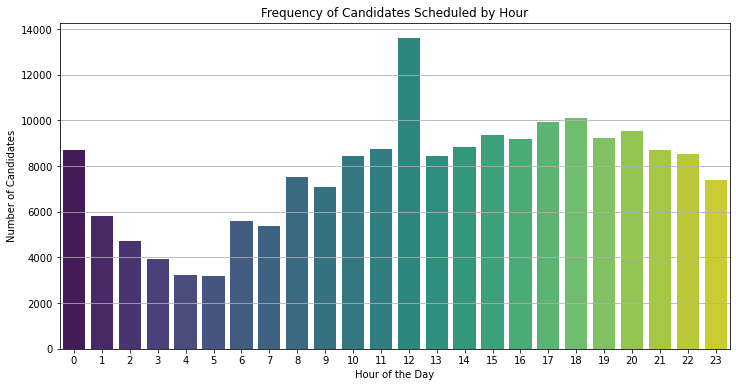

In [21]:
# Qusetion 1). 1. Which hour has the highest frequency of candidates scheduled to take up exams? Show the plot diagram of the frequencies.

# Importing Libraries:

# import pandas as pd: Imports the Pandas library with an alias 'pd' for ease of use.
# import matplotlib.pyplot as plt: Imports the pyplot module from the Matplotlib library with an alias 'plt' for plotting.
# import seaborn as sns: Imports the Seaborn library with an alias 'sns' for statistical data visualization.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset:

# file_path = 'downloads/GRE_Reg_Data.csv': Specifies the file path where the dataset 'GRE_Reg_Data.csv' is located. Make sure to replace this path with the actual path to your dataset.
# data = pd.read_csv(file_path): Reads the CSV file into a Pandas DataFrame called 'data'.

file_path = 'downloads/GRE_Reg_Data.csv'  
data = pd.read_csv(file_path)

# Data Cleaning:

# pd.to_datetime(): Converts the 'Date Registered' and 'DATE OF EXAM OCC' columns from string to datetime format.
# data['Hour'] = data['TIME OCC'] // 100: Extracts the hour from the 'TIME OCC' column and assigns it to a new column called 'Hour'.
# data['Sex'].fillna('Unknown', inplace=True): Fills missing values in the 'Sex' column with 'Unknown'.
# data = data[(data['Age'] >= 10) & (data['Age'] <= 100)]: Removes rows with invalid ages (age less than 10 or greater than 100).
# Convert date columns to datetime
data['Date Registered'] = pd.to_datetime(data['Date Registered'], format='%m/%d/%Y', errors='coerce')
data['DATE OF EXAM OCC'] = pd.to_datetime(data['DATE OF EXAM OCC'], format='%m/%d/%Y', errors='coerce')

# Extract hour from TIME OCC
data['Hour'] = data['TIME OCC'] // 100

# Handle missing values in 'Sex' column by filling with 'Unknown'
data['Sex'].fillna('Unknown', inplace=True)

# Remove invalid entries in 'Age'
data = data[(data['Age'] >= 10) & (data['Age'] <= 100)]

# Data Exploration:

# print(data.info()): Prints concise summary of the DataFrame, including data types and non-null counts.
# print(data.describe(include='all')): Generates descriptive statistics summarizing the central tendency, dispersion, and shape of the dataset.
# print(data.head()): Displays the first few rows of the DataFrame.

# Check data types and basic info
print(data.info())

# Display cleaned data overview
print(data.describe(include='all'))
print(data.head())

# Calculating Hourly Frequency:
# hourly_freq = data['Hour'].value_counts().sort_index(): Calculates the frequency of candidates scheduled per hour and sorts it by the hour index.

# Calculate the frequency of candidates scheduled per hour
hourly_freq = data['Hour'].value_counts().sort_index()

# Finding the Most Frequent Hour:

# most_frequent_hour = hourly_freq.idxmax(): Finds the hour with the highest frequency.
# print(f"The hour with the highest frequency is {most_frequent_hour}:00 with {hourly_freq[most_frequent_hour]} candidates."): Prints the hour with the highest frequency along with the number of candidates scheduled during that hour

# Print the most frequent hour
most_frequent_hour = hourly_freq.idxmax()
print(f"The hour with the highest frequency is {most_frequent_hour}:00 with {hourly_freq[most_frequent_hour]} candidates.")

# Data Visualization:

# plt.figure(figsize=(12, 6)): Sets the figure size for the plot.
# sns.barplot(): Creates a bar plot using Seaborn with hourly frequencies on the x-axis and the number of candidates on the y-axis.
# plt.xlabel(), plt.ylabel(), plt.title(): Sets the labels and title for the plot.
# plt.xticks(): Sets the ticks on the x-axis to range from 0 to 23 (representing hours of the day).
# plt.grid(): Adds a grid to the plot.
# plt.show(): Displays the plot.

# Plotting the frequencies
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_freq.index, y=hourly_freq.values, palette='viridis')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Candidates')
plt.title('Frequency of Candidates Scheduled by Hour')
plt.xticks(range(0, 24))
plt.grid(axis='y')
plt.show()


# Answer of Question 1). The hour with the highest frequency is 12:00 with 13596 candidates.


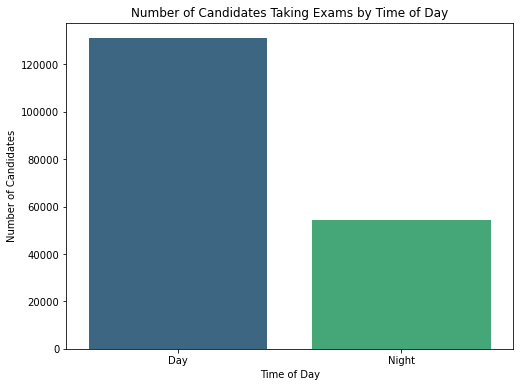

In [13]:
# Question 2). Create stacked bar graph of the number of candidates taken exam both at day and night (Day being 06:00 AM to 09:00 PM)

# Importing Libraries:

# pandas for data manipulation.
# matplotlib.pyplot for plotting graphs.
# seaborn for enhancing the visual aesthetics of the plots.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset:

# The code loads a dataset from a CSV file named 'GRE_Reg_Data.csv' into a Pandas DataFrame.
file_path = 'downloads/GRE_Reg_Data.csv' 
data = pd.read_csv(file_path)

# Convert date columns to datetime
# Converting Date Columns to Datetime:

# Two columns, 'Date Registered' and 'DATE OF EXAM OCC', are converted to datetime format using pd.to_datetime(). These columns represent dates in the format 'month/day/year'. Any errors during conversion are coerced.
data['Date Registered'] = pd.to_datetime(data['Date Registered'], format='%m/%d/%Y', errors='coerce')
data['DATE OF EXAM OCC'] = pd.to_datetime(data['DATE OF EXAM OCC'], format='%m/%d/%Y', errors='coerce')

# Extract hour from TIME OCC

# The 'TIME OCC' column is assumed to represent time in HHMM format. The code divides the values by 100 to extract the hour portion and creates a new column named 'Hour'.

data['Hour'] = data['TIME OCC'] // 100

# Handle missing values in 'Sex' column by filling with 'Unknown'
# Missing values in the 'Sex' column are filled with the string 'Unknown' using fillna().
data['Sex'].fillna('Unknown', inplace=True)

# Remove invalid entries in 'Age'
# Rows where the 'Age' column values fall outside the range of 10 to 100 are removed from the DataFrame using boolean indexing.

data = data[(data['Age'] >= 10) & (data['Age'] <= 100)]

# Classify exam times
def classify_time(hour):
    if 6 <= hour < 21:
        return 'Day'
    else:
        return 'Night'

data['Period'] = data['Hour'].apply(classify_time)

# Count the number of candidates for each period
period_counts = data['Period'].value_counts()

# Plotting the stacked bar graph
# A bar plot is created using Seaborn's sns.barplot(), where the x-axis represents the hour of the day and the y-axis represents the number of candidates scheduled.
# Various plot customizations such as labels, title, ticks, and gridlines are applied using Matplotlib functions.
# The plot is displayed using plt.show().
plt.figure(figsize=(8, 6))
sns.barplot(x=period_counts.index, y=period_counts.values, palette='viridis')
plt.xlabel('Time of Day')
plt.ylabel('Number of Candidates')
plt.title('Number of Candidates Taking Exams by Time of Day')
plt.show()

# Overall, this code preprocesses the dataset, performs basic analysis, and visualizes the frequency of candidates scheduled by hour of the day.


# Answer 2). The answer of the following question is given below in the graph





Age Group
0-17      3119
18-25    24366
26-34    47288
35-44    43759
45-54    29247
55-64    21116
65+      16315
Name: count, dtype: int64


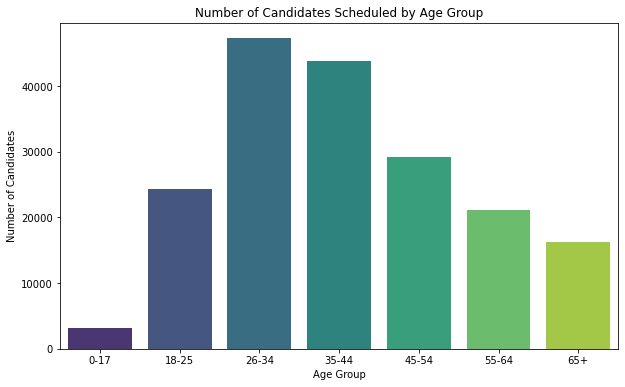

In [16]:
# Question 3). Identify the number of candidates scheduled to write exam in different age groups, with age group labels "0-17", "18-25", "26-34", "35-44", "45-54", "55-64", and "65+" as the index and the frequency of candidates scheduled as the values.

# pandas: Used for data manipulation and analysis.
# matplotlib.pyplot: Used for plotting graphs.
# seaborn: Used for enhanced visualizations.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'downloads/GRE_Reg_Data.csv'  
data = pd.read_csv(file_path)

# Convert date columns to datetime
# Converts the 'Date Registered' and 'DATE OF EXAM OCC' columns from strings to datetime objects using the specified format. Any errors in conversion are coerced into NaT (Not a Time).
data['Date Registered'] = pd.to_datetime(data['Date Registered'], format='%m/%d/%Y', errors='coerce')
data['DATE OF EXAM OCC'] = pd.to_datetime(data['DATE OF EXAM OCC'], format='%m/%d/%Y', errors='coerce')

# Extract hour from TIME OCC
# Extracts the hour from 'TIME OCC' assuming it's in HHMM format by integer division by 100 and stores it in a new column 'Hour'.
data['Hour'] = data['TIME OCC'] // 100

# Handle missing values in 'Sex' column by filling with 'Unknown'
data['Sex'].fillna('Unknown', inplace=True)

# Remove invalid entries in 'Age'
# Filters out rows where 'Age' is less than 10 or greater than 100, keeping only valid entries.
data = data[(data['Age'] >= 10) & (data['Age'] <= 100)]

# Define age groups
# Defines bins and labels for categorizing ages into groups:
# age_bins: Defines the boundaries of the age groups.
# age_labels: Defines the labels for each age group.
age_bins = [0, 17, 25, 34, 44, 54, 64, 100]
age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

# Bin ages into groups
# Creates a new column 'Age Group' by segmenting the 'Age' column into the defined bins and labels. right=False ensures that the bins are left-inclusive.
data['Age Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)

# Calculate the frequency of candidates in each age group
# Calculates the number of candidates in each age group using value_counts(), then sorts the counts by index to ensure the age groups are in order.
age_group_counts = data['Age Group'].value_counts().sort_index()

# Display the frequency of candidates in each age group
print(age_group_counts)

# Plotting the age group frequencies

# Creates a bar plot to visualize the frequency of candidates in each age group:
# figsize=(10, 6): Specifies the size of the plot.
# sns.barplot(): Creates the bar plot with age groups on the x-axis and their counts on the y-axis.
# palette='viridis': Sets the color palette for the bars.
# plt.xlabel(), plt.ylabel(), plt.title(): Add labels and a title to the plot.
# plt.show(): Displays the plot.

plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='viridis')
plt.xlabel('Age Group')
plt.ylabel('Number of Candidates')
plt.title('Number of Candidates Scheduled by Age Group')
plt.show()

# The code loads and preprocesses a dataset, groups candidates by age, calculates the frequency of candidates in each age group, and visualizes this information with a bar plot. This helps in understanding the distribution of candidates across different age ranges.

# Answer 3). The answer of this question is given below in the graph.
